## NBA MVP Prediction

### Introduction

In recent years, the landscape of sports gambling has undergone a transformative shift, fueled by widespread legalization and remarkable advancements in technology. This evolution has not only democratized access to sports betting but has also cultivated a burgeoning market that extends far beyond traditional enthusiasts. Within this dynamic arena, the National Basketball Association (NBA) has emerged as a key player, leveraging strategic partnerships with gambling entities to capitalize on the surging interest among fans. The convergence of sports and gambling has become a ubiquitous aspect of contemporary fan culture, permeating discussions, and experiences surrounding professional basketball betting. Amidst this backdrop, one of the most prestigious accolades in the NBA — the Most Valuable Player (MVP) award — has garnered heightened significance. Like other accolades in the league that are awarded at the end of the regular season, the NBA MVP is not determined by statistical achievements alone but is subject to the deliberation of a select panel comprising 100 sports media members.

It is essential to recognize the subjective nature inherent in the determination of the NBA MVP. While statistical prowess undoubtedly factors into the equation, the final decision rests on the nuanced judgments and subjective evaluations of the panel members. This subjective element introduces an intriguing dimension to the MVP selection process, where intangible qualities such as leadership, impact on team success, and narrative-driven storylines often influence the outcome. Moreover, the profound symbiosis between fan engagement and awards recognition underscores the significance of accurately predicting the NBA MVP each season. As sports gambling continues to permeate mainstream culture, the ability to forecast MVP outcomes assumes heightened relevance, offering enthusiasts an additional layer of engagement and investment in the outcome of the season.

Against this backdrop, this report embarks on a journey to explore the feasibility of predicting the NBA MVP through regression modeling. By delving into the key features that contribute to MVP selection, this study endeavors to unravel the intricate interplay between statistical metrics, qualitative assessments, and the evolving dynamics of professional basketball. Through this endeavor, valuable insights can be gleaned into the factors that shape MVP deliberations and their broader implications for the sports gambling landscape.

### Data Description

The datasets utilized in this analysis encompass a comprehensive range of basketball statistics and voting results pertinent to NBA MVP prediction. These datasets include: Total Stats, Per Game stats, Advanced Stats, Standings, and MVP Voting. Total Stats dataset furnishes cumulative player statistics such as total points, rebounds, assists, field goals, and other performance metrics across various seasons. Complementing this, the Per Game Stats dataset provides insights into players' per-game statistics, offering a more granular perspective on their contributions to their respective teams. Advanced Stats dataset delves deeper into players' performance with advanced metrics including Value Over Replacement Player (VORP), Win Shares (WS), Box Plus Minus (BPM), and Player Efficiency Rating (PER), facilitating a nuanced understanding of player impact and effectiveness on the court. In addition to player-centric data, the analysis incorporates information on league standings throughout the seasons, encapsulated in the Standings dataset. This dataset offers valuable context by highlighting team rankings and performance trends over the specified timeframe. 

Furthermore, the MVP Voting dataset plays a crucial role in evaluating players' MVP candidacy by capturing the outcomes of voting conducted by a panel of 100 sports media members. Each member's first-place vote is worth 10 points, second-place vote is worth 7 points, third-place vote is worth 5 points, fourth-place vote is worth 3 points, and fifth-place vote is worth 1 point, culminating in a maximum possible of 1000 points. The voting share for each player is then computed by dividing the number of votes they receive by this maximum points total, providing a standardized measure of their perceived value and impact in MVP contention. This share metric facilitates fair comparison across seasons and enables analysts to gauge the relative influence of player attributes and statistics on MVP voting outcomes. Importantly, the voting share serves as the target variable in predictive modeling, guiding the development of accurate and reliable MVP prediction models that consider the nuanced dynamics of MVP voting.

Spanning from the 2013 to 2023 seasons, this analysis provides a comprehensive view of player performance and league dynamics over a substantial period. The 2013-2014 season was picked as the first season since the upward trend in scoring, especially from the 3 point range, seems to have begun around this season. The datasets utilized in this study were sourced from Basketball Reference, a trusted platform renowned for its extensive collection of basketball statistics and analytics.

Key features such as Value Over Replacement Player (VORP), Win Shares (WS), Box Plus Minus (BPM), and Player Efficiency Rating (PER) serve as crucial metrics for assessing player performance and predicting MVP outcomes. VORP quantifies a player's estimated box score value of points per 100 team possessions contributed above a replacement-level player, offering insights into their overall impact. In simpler terms, it's a way of measuring how many points a player contributes compared to an average player, considering how they would perform on a normal team, and stretched out to a full season's worth of games. WS estimates the number of wins contributed by a player, encompassing both Offensive Win Shares (OWS) and Defensive Win Shares (DWS). BPM evaluates a player's estimated box score value of points per 100 possessions contributed above a league-average player, providing insights into their offensive and defensive contributions. Simply put, it's figuring out how much a player's performance adds to their team's success compared to an average player, considering what they'd do on a normal team. PER offers a standardized measure of per-minute production, offering a holistic assessment of a player's efficiency and effectiveness on the court. These features form the foundation of the analysis, facilitating the identification of critical factors influencing MVP selection and enhancing predictive modeling efforts.

### Data Pre-Processing

The preprocessing stage played a pivotal role in refining and harmonizing the raw datasets to ensure consistency and accuracy across various data sources. Each dataset underwent a series of tailored preprocessing steps to address specific data characteristics and prepare them for subsequent analysis and modeling.

Standings data underwent transformation to standardize the format and extract relevant information. The 'Overall' column, originally in a W-L format, was modified to represent only the number of wins for each team. For instance, a record of '64-18' would now be reflected simply as '64', streamlining the dataset for further analysis. A new column, 'Season', was created across all datasets to reflect the respective season, facilitating seamless integration and analysis of data across multiple seasons. This addition provided crucial temporal context to the datasets, allowing for comprehensive analysis of player performance and league dynamics over time.

In the merging process, columns from the Total, Per Game, and Advanced Stats datasets were renamed to avoid confusion and maintain clarity in the analysis. For example, columns such as 'PTS_PER_GAME', 'AST_TOTAL', and 'PER_ADVANCED' were renamed to reflect their respective statistics. The Total, Per Game, Advanced, and MVP Voting datasets were merged based on common identifiers such as 'Player' and 'Season', enabling comprehensive analysis of player performance across various statistical categories. Additionally, the 'Overall' column, representing team standings, was added to the merged data and assigned to players based on their respective teams for each season.

Cleaning and handling missing values were crucial steps in ensuring data integrity. NA values in the 'Share' column, often observed when players did not receive any MVP votes, were replaced with 0. Duplicate lines, arising from players who played for multiple teams in a season, were removed to avoid redundancy and maintain dataset clarity. However, it's important to note that when only the first row for such players is retained, there is no overall record attached to that player.

Moreover, NA values in other relevant statistical columns, such as '3P_PER_GAME' and '3P%_PER_GAME', were also handled. These missing values typically occur when a player did not record that particular statistic in a given season. In such cases, missing values were replaced with 0 to mitigate potential biases and ensure completeness in the dataset. These meticulous preprocessing steps were essential in preparing the datasets for robust analysis and modeling of NBA MVP prediction and player performance trends.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Defining the seasons used 
seasons = ['13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23']

def preprocess_standings(data, i):
    # Set the first row values as column names
    data.columns = data.iloc[0]
    # Drop the first row since it's now the column names
    data = data.iloc[1:].reset_index(drop=True)
    # Convert Overall records from 'W-L' format to just wins 
    data['Overall'] = data['Overall'].str.split('-').str[0].astype(int)
    # Reset index after dropping the first row
    data.reset_index(drop=True, inplace=True)
     # Add 'Season' column
    data['Season'] = i
    
    return data

def preprocess_mvp_voting(data, i):
    # Set the first row values as column names
    data.columns = data.iloc[0]
    # Drop the first row since it's now the column names
    data = data.iloc[1:].reset_index(drop=True)
     # Reset index after dropping the first row
    data.reset_index(drop=True, inplace=True)
     # Add 'Season' column
    data['Season'] = i
    
    return data


def populate_data (seasons):
    
    total_stats = pd.DataFrame()
    per_game_stats = pd.DataFrame()
    advanced_stats = pd.DataFrame()
    standings_stats = pd.DataFrame()
    mvp_voting = pd.DataFrame()
    
    for i in seasons:
        #read data in for each season
        totals = pd.read_csv(i+' Totals.csv')
        per_game = pd.read_csv(i+' Per Game.csv')
        advanced = pd.read_csv(i+' Advanced.csv')
        standings = pd.read_csv(i+' Standings.csv')
        mvp = pd.read_csv(i+' MVP.csv')
        
        #set the current season
        totals['Season'] = i
        per_game['Season'] = i
        advanced['Season'] = i
        mvp['Season'] = i
        
        # Preprocess data
        standings = preprocess_standings(standings, i)
        mvp = preprocess_mvp_voting(mvp, i)
        
        #concatenate all the seasons
        total_stats = pd.concat([total_stats,totals], ignore_index=True)
        per_game_stats = pd.concat([per_game_stats,per_game], ignore_index=True)
        advanced_stats = pd.concat([advanced_stats,advanced], ignore_index=True)
        standings_stats = pd.concat([standings_stats,standings], ignore_index=True)
        mvp_voting = pd.concat([mvp_voting,mvp], ignore_index=True)
        
    return total_stats, per_game_stats, advanced_stats, standings_stats, mvp_voting

# Call populate_data function to get the DataFrames
total_stats, per_game_stats, advanced_stats, standings_stats, mvp_voting = populate_data(seasons)

In [3]:
def process_data(per_game_data, total_data, advanced_data, standings_data, mvp_data, seasons):
    # Drop irrelevant columns
    per_game_data = per_game_data.drop(['Rk', 'Pos'], axis=1)
    total_data = total_data.drop(['Rk', 'Pos', 'Age', 'G', 'GS'], axis=1)
    advanced_data = advanced_data.drop(['Rk', 'Pos', 'Age', 'G', 'MP', 'Unnamed: 24', 'Unnamed: 19'], axis=1)
    mvp_data = mvp_data.drop(['Age', 'Tm', 'G'], axis=1 )

    # Identify key columns
    key_columns = ['Player', 'Season', 'Pos', 'Age', 'Tm', 'G', 'GS']

    # Rename columns for clarity
    for column in per_game_data.columns:
        if column not in key_columns:
            new_column_name = column + '_PER_GAME'
            per_game_data = per_game_data.rename(columns={column: new_column_name})

    for column in total_data.columns:
        if column not in key_columns:
            new_column_name = column + '_TOTAL'
            total_data = total_data.rename(columns={column: new_column_name})

    for column in advanced_data.columns:
        if column not in key_columns:
            new_column_name = column + '_ADVANCED'
            advanced_data = advanced_data.rename(columns={column: new_column_name})

    # Merge datasets
    merged_data = per_game_data.merge(advanced_data, on=['Player', 'Season', 'Tm'], how='left', validate='1:1')
    merged_data = merged_data.merge(total_data, on=['Player', 'Season', 'Tm'], how='left', validate='1:1')

    # Convert team names
    team_mapping = {'Utah Jazz': 'UTA', 'Phoenix Suns': 'PHO', 'Philadelphia 76ers': 'PHI', 'Brooklyn Nets': 'BRK',
                    'Denver Nuggets': 'DEN', 'Los Angeles Clippers': 'LAC', 'Milwaukee Bucks': 'MIL',
                    'Dallas Mavericks': 'DAL', 'Los Angeles Lakers': 'LAL', 'Portland Trail Blazers': 'POR',
                    'Atlanta Hawks': 'ATL', 'New York Knicks': 'NYK', 'Miami Heat': 'MIA',
                    'Golden State Warriors': 'GSW', 'Memphis Grizzlies': 'MEM', 'Boston Celtics': 'BOS',
                    'Washington Wizards': 'WAS', 'Indiana Pacers': 'IND', 'Charlotte Hornets': 'CHO', 
                    'San Antonio Spurs': 'SAS', 'Chicago Bulls': 'CHI',
                    'New Orleans Pelicans': 'NOP', 'Sacramento Kings': 'SAC', 'Toronto Raptors': 'TOR',
                    'Minnesota Timberwolves': 'MIN', 'Cleveland Cavaliers': 'CLE', 'Oklahoma City Thunder': 'OKC',
                    'Orlando Magic': 'ORL', 'Detroit Pistons': 'DET', 'Houston Rockets': 'HOU'}

    teams_df = pd.DataFrame.from_dict(team_mapping, orient='index').reset_index()
    teams_df = teams_df.rename(columns={'index': 'Team', 0: 'Tm'})
   

    standings_data = standings_data.merge(teams_df, on='Team', how='left', validate='m:1')

    # Clean player names
    merged_data['Player'] = merged_data['Player'].str.replace('*', '')

    # Merge MVP data
    merged_data = merged_data.merge(mvp_data, on=['Player', 'Season'], how='left').fillna(0)

    merged_data['Player'] = merged_data['Player'].str.split('\\', expand=True)[0]
    
    # Merge the standings data with merged player data
    merged_data = merged_data.merge(standings_data[['Tm', 'Season', 'Overall']], on=['Tm', 'Season'], how='left')

    # Drop the 'Tm' column as it's no longer needed
    merged_data.drop('Tm', axis=1, inplace=True)

    # Remove duplicate lines for traded players
    unique_data = pd.DataFrame()
    for season in seasons:
        season_data = merged_data[merged_data['Season'] == season]
        season_data = season_data.drop_duplicates(subset=['Player'], keep='first')
        unique_data = pd.concat([unique_data, season_data], ignore_index=True)
    
    return unique_data
    

# Get the shape of the processed_data DataFrame
processed_data = process_data(per_game_stats, total_stats, advanced_stats, standings_stats, mvp_voting, seasons)

num_players, num_features = processed_data.shape
print("Number of players:", num_players)
print("Number of columns:", num_features)

# Count the number of missing values in each column
na_counts = processed_data.isna().sum()

# Sort the na_counts Series in descending order
na_counts_sorted = na_counts.sort_values(ascending=False)

# Print the number of missing values in each column
print("Number of missing values in each column:")
print(na_counts_sorted)

# Replace NaN values with 0s in the 'Overall' column in processed_data
processed_data['Overall'].fillna(0, inplace=True)

# Count the number of missing values in each column
na_counts = processed_data.isna().sum()

# Sort the na_counts Series in descending order
na_counts_sorted = na_counts.sort_values(ascending=False)

# Print the number of missing values in each column
print("Number of missing values in each column after replacement:")
print(na_counts_sorted)

Number of players: 5218
Number of columns: 102
Number of missing values in each column:
Overall                    640
ORB_TOTAL                    0
Rank                         0
Player-additional_TOTAL      0
PTS_TOTAL                    0
                          ... 
3PAr_ADVANCED                0
TS%_ADVANCED                 0
PER_ADVANCED                 0
Season                       0
FG_TOTAL                     0
Length: 102, dtype: int64
Number of missing values in each column after replacement:
Player                     0
ORB_TOTAL                  0
Rank                       0
Player-additional_TOTAL    0
PTS_TOTAL                  0
                          ..
3PAr_ADVANCED              0
TS%_ADVANCED               0
PER_ADVANCED               0
Season                     0
Overall                    0
Length: 102, dtype: int64


### Exploratory Analysis

Exploratory Data Analysis (EDA) is a crucial step in understanding the underlying patterns and relationships within the dataset. In this section, I present the results of my EDA focusing on three key features — Total Points Per Game, Total Points, and Win Shares — and their relationship with the MVP Share. I generated scatter plots to visualize the relationship between each feature and the MVP Share. The plots revealed positive relationships across all three features, indicating that higher values of Points Per Game, Total Points, and Win Shares tend to correspond to higher MVP Shares. However, I observed that Total Points and Win Shares exhibited relatively stronger relationships with MVP Share compared to Points Per Game.

A deeper analysis of the plots reveals intriguing insights into the predictive power of these features. Total Points, which represents a player's cumulative scoring output over the season, exhibited a strong positive relationship with MVP Share. This suggests that players who consistently contribute high scoring performances throughout the season are more likely to receive MVP recognition. Similarly, Win Shares, a metric that estimates a player's overall contribution to team success, showed a robust positive relationship with MVP Share. This implies that players who significantly impact their team's performance across various facets of the game are more likely to garner MVP votes.

Furthermore, I identified the top 10 players based on Total Points and Win Shares across different seasons. Among these top performers, several players went on to win the MVP award in their respective seasons, underscoring the importance of these features in MVP selection. For instance, Kevin Durant, Russell Westbrook, and Steph Curry, who appeared frequently in the top 10 lists by Total Points, all secured the MVP title, highlighting the strong correlation between scoring prowess and MVP recognition. Similarly, players like Nikola Jokic and James Harden, along with the previously mentioned names, are prominent figures in the top 10 lists by Win Shares who also clinched the MVP award in their standout seasons. This affirms the significance of all-around contributions to team success in MVP voting.

These findings provide valuable insights into the key features that may influence MVP Share and underscore the importance of further analysis to elucidate the complex dynamics underlying MVP selection in the NBA. The positive relationships observed in the EDA suggest that Total Points and Win Shares could serve as critical predictors in my regression model for MVP prediction. However, additional analysis and model refinement are necessary to validate these findings and develop a robust predictive framework for NBA MVP selection.

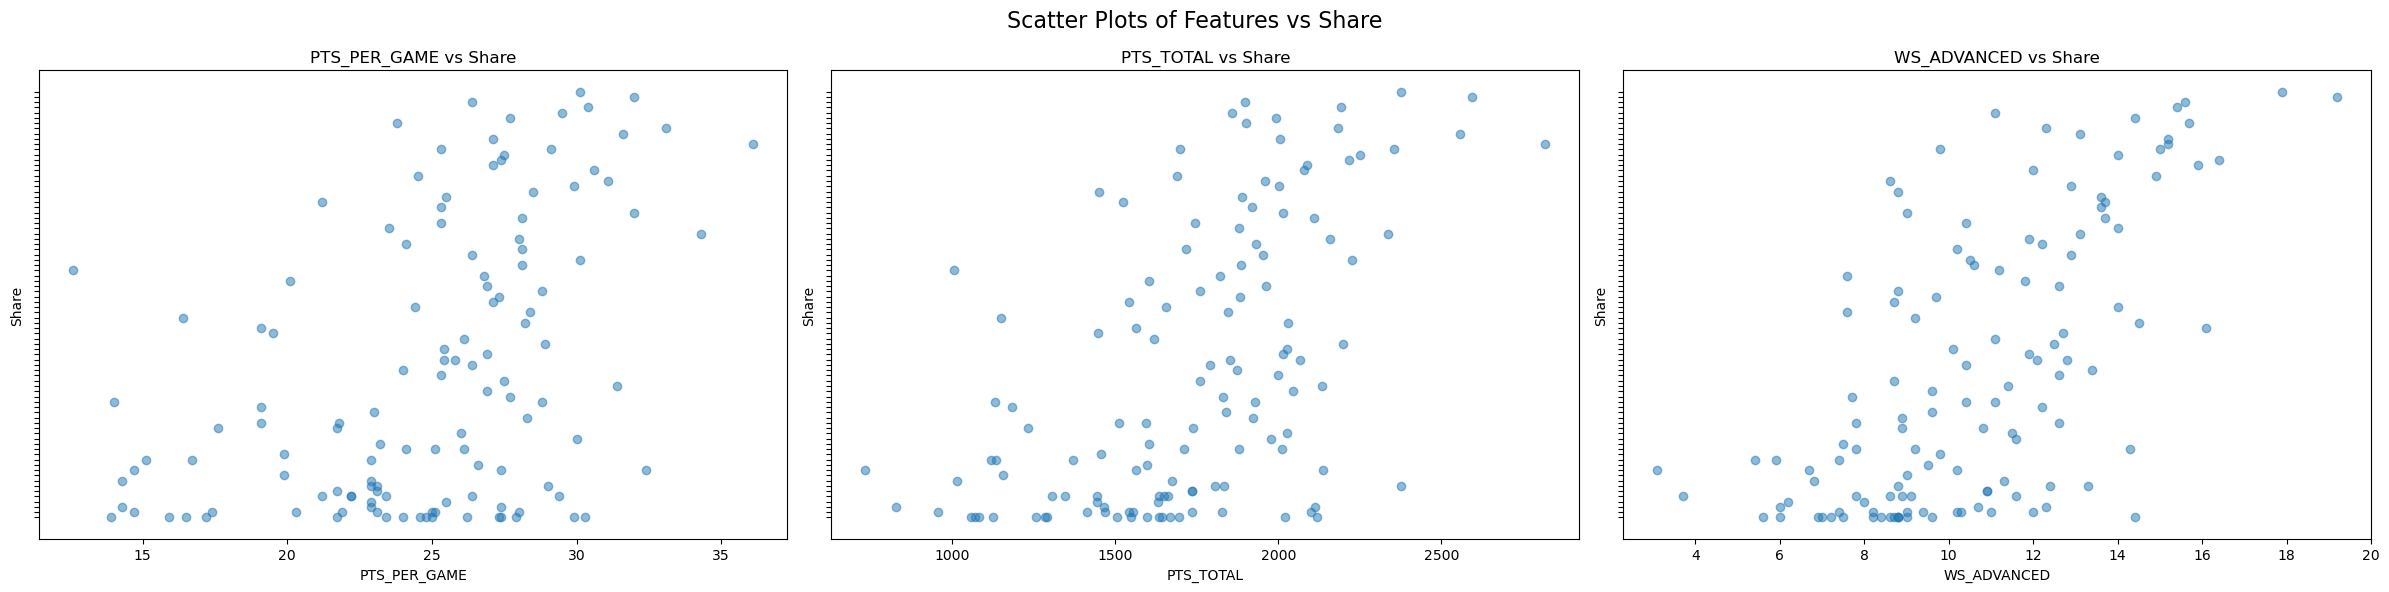

In [7]:
# Selecting features of interest and target variable
features_of_interest = ["PTS_PER_GAME", "PTS_TOTAL", "WS_ADVANCED"]
target_variable = "Share"

# Filter processed_data to remove players with 0 MVP shares
filtered_data = processed_data[processed_data['Share'] != 0]

# Sort the filtered data based on 'Share' column
filtered_data = filtered_data.sort_values(by='Share')

# Create scatter plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))
fig.suptitle("Scatter Plots of Features vs Share", fontsize=16)

# Generate scatter plots
for idx, feature in enumerate(features_of_interest):
    axes[idx].scatter(filtered_data[feature], filtered_data[target_variable], alpha=0.5)
    axes[idx].set_title(f"{feature} vs Share")
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel("Share")
    
     # Hide y-axis values
    axes[idx].set_yticklabels([])

plt.tight_layout()
plt.savefig('scatter_plot.png')
plt.show()


In [11]:
# Select the top 10 players by total points
top_10_points = processed_data.nlargest(10, 'PTS_TOTAL')

# Select the top 10 players by win shares
top_10_win_shares = processed_data.nlargest(10, 'WS_ADVANCED')

print("Top 10 Players by Total Points:")
print(top_10_points[['Season', 'Player', 'PTS_TOTAL']])

print("\nTop 10 Players by Win Shares:")
print(top_10_win_shares[['Season', 'Player', 'WS_ADVANCED']])

Top 10 Players by Total Points:
     Season             Player  PTS_TOTAL
2681  18-19       James Harden       2818
133   13-14       Kevin Durant       2593
1906  16-17  Russell Westbrook       2558
1150  15-16       James Harden       2376
1077  15-16      Stephen Curry       2375
1621  16-17       James Harden       2356
3203  19-20       James Harden       2335
2183  17-18       LeBron James       2251
4684  22-23       Jayson Tatum       2225
678   14-15       James Harden       2217

Top 10 Players by Win Shares:
     Season         Player  WS_ADVANCED
133   13-14   Kevin Durant         19.2
1077  15-16  Stephen Curry         17.9
678   14-15   James Harden         16.4
841   14-15     Chris Paul         16.1
226   13-14   LeBron James         15.9
592   14-15  Stephen Curry         15.7
3796  20-21   Nikola Jokić         15.6
2129  17-18   James Harden         15.4
2681  18-19   James Harden         15.2
4363  21-22   Nikola Jokić         15.2


### Modeling

This section outlines the process of building predictive models to forecast MVP Share in the NBA. It covers feature selection, data splitting, model definition, parameter tuning, evaluation, and feature importance analysis.

A diverse range of player performance metrics and advanced statistics were chosen as features for predicting MVP Share. These include points per game, total points, Win Shares (WS), Value Over Replacement Player (VORP), field goal percentages, assists, rebounds, and various other metrics. Before modeling, the data underwent preprocessing to handle missing values, standardize features, and prepare the dataset for analysis. The dataset was then divided into training and testing sets, where the models were trained on the data from the 13-14 season to the 20-21 season and the 21-22 season was the test set. This approach ensures that models are trained on a subset of the data and evaluated on unseen data to gauge their generalization performance.

A variety of regression models were selected for evaluation, including Linear Regression, Ridge Regression, Lasso Regression, Elastic Net, Random Forest, Stochastic Gradient Boosting, and Neural Network. Each model was encapsulated within a pipeline to facilitate feature standardization and hyperparameter tuning.

Parameter Tuning Details:

Linear Regression: No hyperparameters were tuned as it's a basic linear model.

Ridge Regression and Lasso Regression: The alpha parameter, controlling the strength of regularization, was tuned with values [0.1, 1.0, 10.0].

Elastic Net: Both the alpha parameter (for regularization strength) and the l1_ratio parameter (for the balance between L1 and L2 penalties) were tuned with values [0.1, 1.0, 10.0] and [0.1, 0.5, 0.9], respectively.

Random Forest: Parameters tuned included the number of estimators, max depth, and max leaf nodes with values [100, 200, 300], [None, 10, 20], and [None, 5, 10], respectively.

Stochastic Gradient Boosting: Parameters tuned were the number of estimators, max depth, learning rate, and subsample with values [100, 200, 300], [3, 5, 7], [0.01, 0.1, 0.3], and [0.7, 0.8, 0.9], respectively.

Neural Network: The hidden_layer_sizes parameter, defining the neural network's structure, was tuned with values [(50,), (100,), (100, 50)].

Each model was trained using the training data and assessed using root mean squared error (RMSE) and 5-fold cross validation on the test data. RMSE measures the average magnitude of errors between predicted and actual MVP Shares, with lower values indicating better predictive performance. Among the models assessed, Random Forest and Stochastic Gradient Boosting demonstrated the lowest RMSE values, with RMSE values of 0.0179 and 0.0188, respectively, suggesting strong predictive capabilities. Additionally, feature importance analysis highlighted the significance of advanced player metrics such as VORP, which quantifies a player's value compared to a hypothetical replacement-level player, in predicting MVP Share. Other metrics such as Win Shares, Box Plus Minus, Free Throws made per game, and Usage %, which is how often the team's possessions end with that player, were also identified as key features for both models.

Before delving into the predictive analysis, let's acknowledge the top 10 players with the highest Value Over Replacement Player (VORP) in the NBA to examine the importance of the metric. Over the past 10 seasons, the leaders in VORP include Nikola Jokić, Kevin Durant, Stephen Curry, and others who went on to win an MVP that respective season. My analysis reveals that out of these top 10 players, four went on to win the MVP award, indicating the significance of VORP in recognizing exceptional player performance.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [6]:
# Selecting features and target variable
features = ['Age', 'G', 'GS', 'MP_PER_GAME', 'FG_PER_GAME',
       'FGA_PER_GAME', 'FG%_PER_GAME', '3P_PER_GAME', '3PA_PER_GAME',
       '3P%_PER_GAME', '2P_PER_GAME', '2PA_PER_GAME', '2P%_PER_GAME',
       'eFG%_PER_GAME', 'FT_PER_GAME', 'FTA_PER_GAME', 'FT%_PER_GAME',
       'ORB_PER_GAME', 'DRB_PER_GAME', 'TRB_PER_GAME', 'AST_PER_GAME',
       'STL_PER_GAME', 'BLK_PER_GAME', 'TOV_PER_GAME', 'PF_PER_GAME',
       'PTS_PER_GAME', 'PER_ADVANCED', 'TS%_ADVANCED', '3PAr_ADVANCED', 'FTr_ADVANCED', 'ORB%_ADVANCED',
       'DRB%_ADVANCED', 'TRB%_ADVANCED', 'AST%_ADVANCED', 'STL%_ADVANCED',
       'BLK%_ADVANCED', 'TOV%_ADVANCED', 'USG%_ADVANCED', 'OWS_ADVANCED',
       'DWS_ADVANCED', 'WS_ADVANCED', 'WS/48_ADVANCED', 'OBPM_ADVANCED',
       'DBPM_ADVANCED', 'BPM_ADVANCED', 'VORP_ADVANCED','MP_TOTAL', 'FG_TOTAL', 'FGA_TOTAL',
       'FG%_TOTAL', '3P_TOTAL', '3PA_TOTAL', '3P%_TOTAL', '2P_TOTAL',
       '2PA_TOTAL', '2P%_TOTAL', 'eFG%_TOTAL', 'FT_TOTAL', 'FTA_TOTAL',
       'FT%_TOTAL', 'ORB_TOTAL', 'DRB_TOTAL', 'TRB_TOTAL', 'AST_TOTAL',
       'STL_TOTAL', 'BLK_TOTAL', 'TOV_TOTAL', 'PF_TOTAL', 'PTS_TOTAL', 'Overall']

target = 'Share'

# Define the training seasons and the target season for the 21-22 Season
training_seasons = ['13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21']
target_season = '21-22'

# Filter data for training and target seasons
train_data = processed_data[processed_data['Season'].isin(training_seasons)]
test_data = processed_data[processed_data['Season'] == target_season]

X_train, y_train = train_data[features], train_data[target]
X_test, y_test = test_data[features], test_data[target]

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42),
    'Elastic Net': ElasticNet(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Stochastic Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Neural Network': MLPRegressor(random_state=42)
}

# Define parameter grids for each model
param_grids = {
    'Linear Regression': {},
    'Ridge Regression': {'model__alpha': [0.1, 1.0, 10.0]},  
    'Lasso Regression': {'model__alpha': [0.1, 1.0, 10.0]},  
    'Elastic Net': {'model__alpha': [0.1, 1.0, 10.0], 'model__l1_ratio': [0.1, 0.5, 0.9]}, 
    'Random Forest': {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [None, 10, 20],
        'model__max_leaf_nodes': [None, 5, 10]
    },
    'Stochastic Gradient Boosting': {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [3, 5, 7],
        'model__learning_rate': [0.01, 0.1, 0.3],
        'model__subsample': [0.7, 0.8, 0.9]
    },
    'Neural Network': {
        'model__hidden_layer_sizes': [(50,), (100,), (100, 50)]
    }
}

# Initialize and train models with parameter tuning
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize the features
        ('model', model)  # Model to be trained
    ])
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='neg_mean_squared_error', verbose=1)
    grid_search.fit(X_train, y_train)
    predictions = grid_search.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    print(f"{name} RMSE:", rmse)
    print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Linear Regression RMSE: 0.043120125367042586
Best Parameters: {}
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Ridge Regression RMSE: 0.042834676741984615
Best Parameters: {'model__alpha': 10.0}
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Lasso Regression RMSE: 0.052652810367733456
Best Parameters: {'model__alpha': 0.1}
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Elastic Net RMSE: 0.047045040549214094
Best Parameters: {'model__alpha': 0.1, 'model__l1_ratio': 0.1}
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Random Forest RMSE: 0.017900486990697555
Best Parameters: {'model__max_depth': None, 'model__max_leaf_nodes': None, 'model__n_estimators': 200}
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Stochastic Gradient Boosting RMSE: 0.018780052178000745
Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 200, 'mode

In [7]:
# Selecting features and target variable
features = ['Age', 'G', 'GS', 'MP_PER_GAME', 'FG_PER_GAME',
       'FGA_PER_GAME', 'FG%_PER_GAME', '3P_PER_GAME', '3PA_PER_GAME',
       '3P%_PER_GAME', '2P_PER_GAME', '2PA_PER_GAME', '2P%_PER_GAME',
       'eFG%_PER_GAME', 'FT_PER_GAME', 'FTA_PER_GAME', 'FT%_PER_GAME',
       'ORB_PER_GAME', 'DRB_PER_GAME', 'TRB_PER_GAME', 'AST_PER_GAME',
       'STL_PER_GAME', 'BLK_PER_GAME', 'TOV_PER_GAME', 'PF_PER_GAME',
       'PTS_PER_GAME', 'PER_ADVANCED', 'TS%_ADVANCED', '3PAr_ADVANCED', 'FTr_ADVANCED', 'ORB%_ADVANCED',
       'DRB%_ADVANCED', 'TRB%_ADVANCED', 'AST%_ADVANCED', 'STL%_ADVANCED',
       'BLK%_ADVANCED', 'TOV%_ADVANCED', 'USG%_ADVANCED', 'OWS_ADVANCED',
       'DWS_ADVANCED', 'WS_ADVANCED', 'WS/48_ADVANCED', 'OBPM_ADVANCED',
       'DBPM_ADVANCED', 'BPM_ADVANCED', 'VORP_ADVANCED','MP_TOTAL', 'FG_TOTAL', 'FGA_TOTAL',
       'FG%_TOTAL', '3P_TOTAL', '3PA_TOTAL', '3P%_TOTAL', '2P_TOTAL',
       '2PA_TOTAL', '2P%_TOTAL', 'eFG%_TOTAL', 'FT_TOTAL', 'FTA_TOTAL',
       'FT%_TOTAL', 'ORB_TOTAL', 'DRB_TOTAL', 'TRB_TOTAL', 'AST_TOTAL',
       'STL_TOTAL', 'BLK_TOTAL', 'TOV_TOTAL', 'PF_TOTAL', 'PTS_TOTAL', 'Overall']

target = 'Share'

# Define the training seasons and the target season for the 21-22 Season
training_seasons = ['13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21']
target_season = '21-22'

# Filter data for training and target seasons
train_data = processed_data[processed_data['Season'].isin(training_seasons)]
test_data = processed_data[processed_data['Season'] == target_season]

X_train, y_train = train_data[features], train_data[target]
X_test, y_test = test_data[features], test_data[target]

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models with best parameters
rf_model = RandomForestRegressor(n_estimators=200, max_depth=None, max_leaf_nodes=None, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=200, max_depth=7, learning_rate=0.1, subsample=0.7, random_state=42)

# Fit the models to the training data
rf_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)

# Get feature importances for Random Forest model
rf_feature_importance = rf_model.feature_importances_

# Create a DataFrame to store feature importances
rf_feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': rf_feature_importance})

# Sort feature importances in descending order
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=True)

# Print feature importances
print("Random Forest Feature Importances:")
print(rf_feature_importance_df)

# Get feature importances for Gradient Boosting model
gb_feature_importance = gb_model.feature_importances_

# Create a DataFrame to store feature importances
gb_feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': gb_feature_importance})

# Sort feature importances in descending order
gb_feature_importance_df = gb_feature_importance_df.sort_values(by='Importance', ascending=True)

# Print feature importances
print("Gradient Boosting Feature Importances:")
print(gb_feature_importance_df)

Random Forest Feature Importances:
          Feature  Importance
28  3PAr_ADVANCED    0.000154
22   BLK_PER_GAME    0.000203
48      FGA_TOTAL    0.000330
10    2P_PER_GAME    0.000529
35  BLK%_ADVANCED    0.000614
..            ...         ...
44   BPM_ADVANCED    0.018255
15   FTA_PER_GAME    0.021266
38   OWS_ADVANCED    0.021770
40    WS_ADVANCED    0.024758
45  VORP_ADVANCED    0.683664

[70 rows x 2 columns]
Gradient Boosting Feature Importances:
           Feature  Importance
28   3PAr_ADVANCED    0.000027
32   TRB%_ADVANCED    0.000046
6     FG%_PER_GAME    0.000057
56      eFG%_TOTAL    0.000077
2               GS    0.000127
..             ...         ...
64       STL_TOTAL    0.023290
41  WS/48_ADVANCED    0.029269
15    FTA_PER_GAME    0.029282
37   USG%_ADVANCED    0.043154
45   VORP_ADVANCED    0.611416

[70 rows x 2 columns]


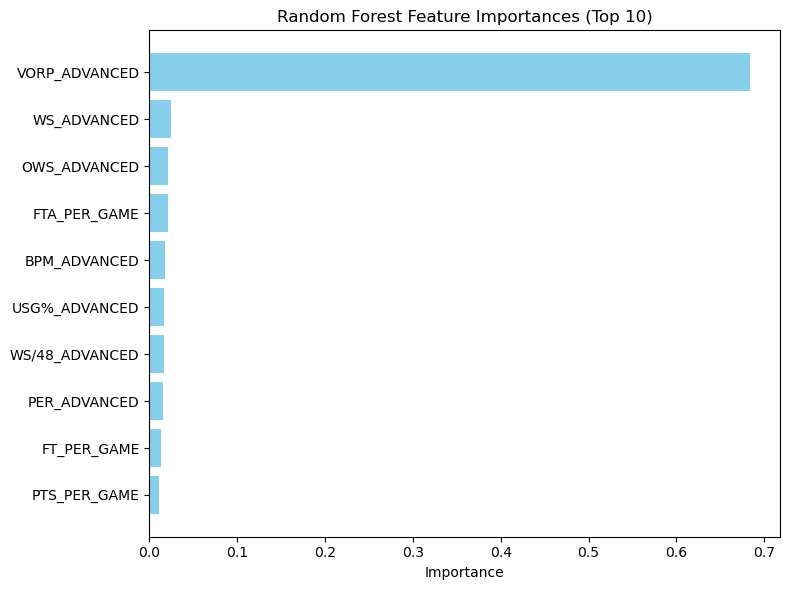

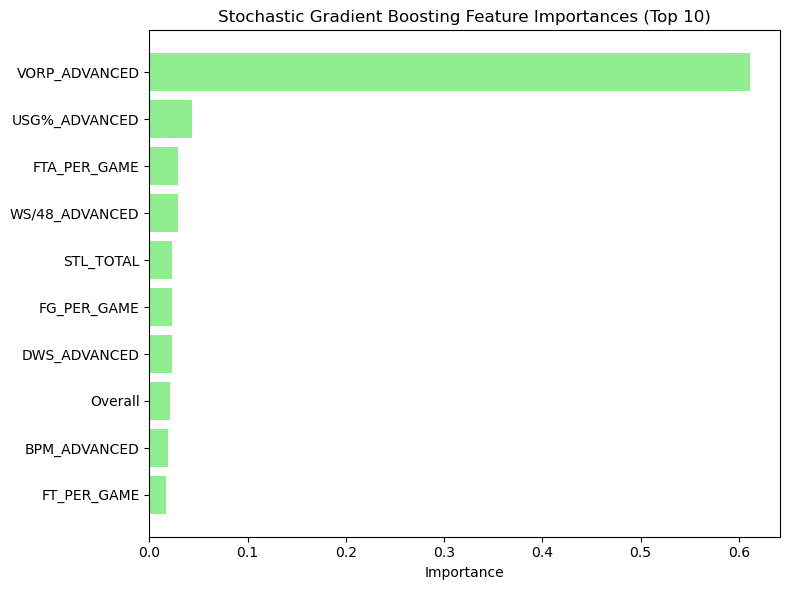

In [8]:
# Sort Random Forest feature importances in descending order and select top 10
top_rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False).head(10).sort_values(by='Importance', ascending=True)

# Sort Gradient Boosting feature importances in descending order and select top 10
top_gb_feature_importance_df = gb_feature_importance_df.sort_values(by='Importance', ascending=False).head(10).sort_values(by='Importance', ascending=True)

# Set up figure and axis for Random Forest plot
fig, ax_rf = plt.subplots(figsize=(8, 6))

# Plot Random Forest feature importances
ax_rf.barh(top_rf_feature_importance_df['Feature'], top_rf_feature_importance_df['Importance'], color='skyblue')
ax_rf.set_title('Random Forest Feature Importances (Top 10)')
ax_rf.set_xlabel('Importance')

# Adjust layout
plt.tight_layout()

# Save Random Forest plot as an image
plt.savefig('random_forest_feature_importances.png')

plt.show()

# Set up figure and axis for Gradient Boosting plot
fig, ax_gb = plt.subplots(figsize=(8, 6))

# Plot Gradient Boosting feature importances
ax_gb.barh(top_gb_feature_importance_df['Feature'], top_gb_feature_importance_df['Importance'], color='lightgreen')
ax_gb.set_title('Stochastic Gradient Boosting Feature Importances (Top 10)')
ax_gb.set_xlabel('Importance')

# Adjust layout
plt.tight_layout()

# Save Gradient Boosting plot as an image
plt.savefig('gradient_boosting_feature_importances.png')

plt.show()

In [22]:
# Select the top 10 players with the highest values for each column
top_players_VORP = processed_data.nlargest(10, 'VORP_ADVANCED')

# Print the top players for each column
print("Top 10 players with the highest VORP:")
print(top_players_VORP[['Player', 'Season', 'VORP_ADVANCED']])

Top 10 players with the highest VORP:
                 Player Season  VORP_ADVANCED
4363       Nikola Jokić  21-22            9.8
133        Kevin Durant  13-14            9.6
1077      Stephen Curry  15-16            9.5
1906  Russell Westbrook  16-17            9.3
2681       James Harden  18-19            9.3
3796       Nikola Jokić  20-21            8.8
4703       Nikola Jokić  22-23            8.8
2183       LeBron James  17-18            8.2
678        James Harden  14-15            8.1
1621       James Harden  16-17            8.0


### Results and Predictions

Using Random Forest and Stochastic Gradient Boosting models with the optimal hyperparameters, I forecasted MVP results for the 2021-2022 and 2022-2023 seasons. While both models generally agreed on the top performers, there were a few differences in their projections. In both the 2021-2022 and 2022-2023 season, for instance, both models identified the same top 4 MVP candidates. However, both models had different players at the number 5 spot for both seasons. These nuanced differences in emphasis reflect the inherent variability in modeling techniques and the complex nature of player performance dynamics.

When comparing the model predictions with the actual share, there were instances of both alignment and disparity. In some cases, the top predicted performers closely mirrored the actual outcomes, demonstrating the models' accuracy in forecasting voting outcomes. For example, both models correctly identified Nikola Jokić as the MVP favorite for the 2021-22 season, consistent with his actual share. However, there were also instances where the models diverged from the actual results. In the 2022-2023 season, the models may have underestimated the contributions of certain players, like Joel Embiid who was the MVP winner that season, or failed to account for unforeseen circumstances such as injuries or team dynamics. Despite these variations, the models provide valuable insights into potential MVP candidates and player impact for each season.

Finally, the predicted results for the 2023-2024 season shed light on the intriguing dynamics of the current MVP speculation. Both the Random Forest and Stochastic Gradient Boosting models converge on Nikola Jokić and Luka Dončić as the leading contenders for MVP honors, with Giannis Antetokounmpo closely trailing behind. Shai Gilgeous-Alexander and Domantas Sabonis round out the top five predicted candidates according to both models.

In considering the Random Forest and Stochastic Gradient Boosting models, I would lean towards the Random Forest model for several reasons. Firstly, it boasts a slightly lower RMSE compared to the Stochastic Gradient Boosting model, indicating better overall predictive accuracy. Additionally, the Random Forest model requires fewer parameters to tune, simplifying the model selection process and potentially reducing the risk of overfitting. While both models offer valuable insights, the Random Forest model's superior performance in terms of RMSE and simplicity makes it the preferred choice for MVP speculation in the 2023-2024 NBA season.

In [9]:
# Define the training seasons and the target season for the 21-22 Season
training_seasons = ['13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21']
target_season = '21-22'

# Filter data for training and target seasons
training_data = processed_data[processed_data['Season'].isin(training_seasons)]
target_data = processed_data[processed_data['Season'] == target_season]

# Splitting data into features and target
X_train = training_data[features]
y_train = training_data[target]
X_target = target_data[features]

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_target_scaled = scaler.transform(X_target)

# Fit the models to the scaled training data
rf_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)

# Make predictions for the 2021-2022 season
rf_predictions_21_22 = rf_model.predict(X_target_scaled)
gb_predictions_21_22 = gb_model.predict(X_target_scaled)

# Create a DataFrame to store predictions
predictions_df = pd.DataFrame({
    'Player': target_data['Player'],  
    'Random Forest Predicted Share': rf_predictions_21_22,
    'Gradient Boosting Predicted Share': gb_predictions_21_22,
    'Share': target_data[target]
})

# Convert 'Share' column to numeric
predictions_df['Share'] = pd.to_numeric(predictions_df['Share'], errors='coerce')

# Drop rows with NaN values in the 'Share' column
predictions_df.dropna(subset=['Share'], inplace=True)


# Select top 5 players for each type of share
top_5_actual_share = predictions_df.nlargest(5, 'Share')[['Player', 'Share', 'Random Forest Predicted Share', 'Gradient Boosting Predicted Share']]
top_5_rf_predicted_share = predictions_df.nlargest(5, 'Random Forest Predicted Share')[['Player', 'Share', 'Random Forest Predicted Share']]
top_5_gb_predicted_share = predictions_df.nlargest(5, 'Gradient Boosting Predicted Share')[['Player', 'Share', 'Gradient Boosting Predicted Share']]

# Print top 5 players for each type of share
print("Top 5 players by actual share:")
print(top_5_actual_share)
print("\nTop 5 players by Random Forest predicted share:")
print(top_5_rf_predicted_share)
print("\nTop 5 players by Gradient Boosting predicted share:")
print(top_5_gb_predicted_share)

Top 5 players by actual share:
                     Player  Share  Random Forest Predicted Share  \
4363           Nikola Jokić  0.875                       0.881670   
4235            Joel Embiid  0.706                       0.395770   
4085  Giannis Antetokounmpo  0.595                       0.707385   
4132           Devin Booker  0.216                       0.006265   
4214            Luka Dončić  0.146                       0.283230   

      Gradient Boosting Predicted Share  
4363                           0.910405  
4235                           0.375596  
4085                           0.641609  
4132                           0.009318  
4214                           0.336574  

Top 5 players by Random Forest predicted share:
                     Player  Share  Random Forest Predicted Share
4363           Nikola Jokić  0.875                       0.881670
4085  Giannis Antetokounmpo  0.595                       0.707385
4235            Joel Embiid  0.706                     

In [10]:
# Define the training seasons and the target season for the 22-23 Season
training_seasons = ['13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22']
target_season = '22-23'

# Filter data for training and target seasons
training_data = processed_data[processed_data['Season'].isin(training_seasons)]
target_data = processed_data[processed_data['Season'] == target_season]

# Splitting data into features and target
X_train = training_data[features]
y_train = training_data[target]
X_target = target_data[features]

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_target_scaled = scaler.transform(X_target)

# Fit the models to the scaled training data
rf_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)

# Make predictions for the 2022-2023 season
rf_predictions_22_23 = rf_model.predict(X_target_scaled)
gb_predictions_22_23 = gb_model.predict(X_target_scaled)

# Create a DataFrame to store predictions
predictions_df = pd.DataFrame({
    'Player': target_data['Player'],  
    'Random Forest Predicted Share': rf_predictions_22_23,
    'Gradient Boosting Predicted Share': gb_predictions_22_23,
    'Share': target_data[target]
})

# Convert 'Share' column to numeric
predictions_df['Share'] = pd.to_numeric(predictions_df['Share'], errors='coerce')

# Drop rows with NaN values in the 'Share' column
predictions_df.dropna(subset=['Share'], inplace=True)


# Select top 5 players for each type of share
top_5_actual_share = predictions_df.nlargest(5, 'Share')[['Player', 'Share', 'Random Forest Predicted Share', 'Gradient Boosting Predicted Share']]
top_5_rf_predicted_share = predictions_df.nlargest(5, 'Random Forest Predicted Share')[['Player', 'Share', 'Random Forest Predicted Share']]
top_5_gb_predicted_share = predictions_df.nlargest(5, 'Gradient Boosting Predicted Share')[['Player', 'Share', 'Gradient Boosting Predicted Share']]

# Print top 5 players for each type of share
print("Top 5 players by actual share:")
print(top_5_actual_share)
print("\nTop 5 players by Random Forest predicted share:")
print(top_5_rf_predicted_share)
print("\nTop 5 players by Gradient Boosting predicted share:")
print(top_5_gb_predicted_share)

Top 5 players by actual share:
                       Player  Share  Random Forest Predicted Share  \
4679              Joel Embiid  0.915                       0.528175   
4703             Nikola Jokić  0.674                       0.765395   
4683    Giannis Antetokounmpo  0.606                       0.367280   
4684             Jayson Tatum  0.280                       0.085370   
4682  Shai Gilgeous-Alexander  0.046                       0.352160   

      Gradient Boosting Predicted Share  
4679                           0.520969  
4703                           0.874738  
4683                           0.455997  
4684                           0.072392  
4682                           0.268134  

Top 5 players by Random Forest predicted share:
                       Player  Share  Random Forest Predicted Share
4703             Nikola Jokić  0.674                       0.765395
4679              Joel Embiid  0.915                       0.528175
4680              Luka Dončić  0.010 

In [11]:
def populate_data_test (seasons):
    
    total_stats = pd.DataFrame()
    per_game_stats = pd.DataFrame()
    advanced_stats = pd.DataFrame()
    standings_stats = pd.DataFrame()
    
    for i in seasons:
        #read data in for each season
        if i == '23-24':  # Only process the 23-24 season
            totals = pd.read_csv(i+' Totals.csv')
            per_game = pd.read_csv(i+' Per Game.csv')
            advanced = pd.read_csv(i+' Advanced.csv')
            standings = pd.read_csv(i+' Standings.csv')

            #set the current season
            totals['Season'] = i
            per_game['Season'] = i
            advanced['Season'] = i

            # Preprocess data
            standings = preprocess_standings(standings, i)

            #concatenate all the seasons
            total_stats = pd.concat([total_stats,totals], ignore_index=True)
            per_game_stats = pd.concat([per_game_stats,per_game], ignore_index=True)
            advanced_stats = pd.concat([advanced_stats,advanced], ignore_index=True)
            standings_stats = pd.concat([standings_stats,standings], ignore_index=True)
        
    return total_stats, per_game_stats, advanced_stats, standings_stats

# Modify the seasons list to only include the desired season
seasons = ['23-24']

# Call populate_data function to get the DataFrames
total_stats, per_game_stats, advanced_stats, standings_stats = populate_data_test(seasons)

In [12]:
def process_data_test(per_game_data, total_data, advanced_data, standings_data, seasons):
    # Drop irrelevant columns
    per_game_data = per_game_data.drop(['Rk', 'Pos'], axis=1)
    total_data = total_data.drop(['Rk', 'Pos', 'Age', 'G', 'GS'], axis=1)
    advanced_data = advanced_data.drop(['Rk', 'Pos', 'Age', 'G', 'MP', 'Unnamed: 24', 'Unnamed: 19'], axis=1)
  
    # Identify key columns
    key_columns = ['Player', 'Season', 'Pos', 'Age', 'Tm', 'G', 'GS']

    # Rename columns for clarity
    for column in per_game_data.columns:
        if column not in key_columns:
            new_column_name = column + '_PER_GAME'
            per_game_data = per_game_data.rename(columns={column: new_column_name})

    for column in total_data.columns:
        if column not in key_columns:
            new_column_name = column + '_TOTAL'
            total_data = total_data.rename(columns={column: new_column_name})

    for column in advanced_data.columns:
        if column not in key_columns:
            new_column_name = column + '_ADVANCED'
            advanced_data = advanced_data.rename(columns={column: new_column_name})

    # Merge datasets
    merged_data = per_game_data.merge(advanced_data, on=['Player', 'Season', 'Tm'], how='left', validate='1:1')
    merged_data = merged_data.merge(total_data, on=['Player', 'Season', 'Tm'], how='left', validate='1:1')

    # Convert team names
    team_mapping = {'Utah Jazz': 'UTA', 'Phoenix Suns': 'PHO', 'Philadelphia 76ers': 'PHI', 'Brooklyn Nets': 'BRK',
                    'Denver Nuggets': 'DEN', 'Los Angeles Clippers': 'LAC', 'Milwaukee Bucks': 'MIL',
                    'Dallas Mavericks': 'DAL', 'Los Angeles Lakers': 'LAL', 'Portland Trail Blazers': 'POR',
                    'Atlanta Hawks': 'ATL', 'New York Knicks': 'NYK', 'Miami Heat': 'MIA',
                    'Golden State Warriors': 'GSW', 'Memphis Grizzlies': 'MEM', 'Boston Celtics': 'BOS',
                    'Washington Wizards': 'WAS', 'Indiana Pacers': 'IND', 'Charlotte Hornets': 'CHO', 
                    'San Antonio Spurs': 'SAS', 'Chicago Bulls': 'CHI',
                    'New Orleans Pelicans': 'NOP', 'Sacramento Kings': 'SAC', 'Toronto Raptors': 'TOR',
                    'Minnesota Timberwolves': 'MIN', 'Cleveland Cavaliers': 'CLE', 'Oklahoma City Thunder': 'OKC',
                    'Orlando Magic': 'ORL', 'Detroit Pistons': 'DET', 'Houston Rockets': 'HOU'}

    teams_df = pd.DataFrame.from_dict(team_mapping, orient='index').reset_index()
    teams_df = teams_df.rename(columns={'index': 'Team', 0: 'Tm'})
   

    standings_data = standings_data.merge(teams_df, on='Team', how='left', validate='m:1')
    
    # Clean player names
    merged_data['Player'] = merged_data['Player'].str.replace('*', '')

    merged_data['Player'] = merged_data['Player'].str.split('\\', expand=True)[0]
    
    # Merge the standings data with merged player data
    merged_data = merged_data.merge(standings_data[['Tm', 'Season', 'Overall']], on=['Tm', 'Season'], how='left')

    # Drop the 'Tm' column as it's no longer needed
    merged_data.drop('Tm', axis=1, inplace=True)

    # Remove duplicate lines for traded players
    unique_data = pd.DataFrame()
    for season in seasons:
        season_data = merged_data[merged_data['Season'] == season]
        season_data = season_data.drop_duplicates(subset=['Player'], keep='first')
        unique_data = pd.concat([unique_data, season_data], ignore_index=True)
    
    return unique_data

# Call process_data for the 23-24 season
processed_data_23_24 = process_data_test(per_game_stats, total_stats, advanced_stats, standings_stats, seasons)

# Get the shape of the processed_data DataFrame
num_players_23_24, num_features_23_24 = processed_data_23_24.shape
print("Number of players (23-24 season):", num_players_23_24)
print("Number of features (23-24 season):", num_features_23_24)

# Replace NaN values with 0s in the 'Overall' column in processed_data
processed_data_23_24.fillna(0, inplace=True)

# Count the number of missing values in each column
na_counts = processed_data_23_24.isna().sum()

# Sort the na_counts Series in descending order
na_counts_sorted = na_counts.sort_values(ascending=False)

# Print the number of missing values in each column
print("Number of missing values in each column:")
print(na_counts_sorted)

Number of players (23-24 season): 572
Number of features (23-24 season): 75
Number of missing values in each column:
Player          0
3P%_TOTAL       0
3P_TOTAL        0
FG%_TOTAL       0
FGA_TOTAL       0
               ..
TOV_PER_GAME    0
BLK_PER_GAME    0
STL_PER_GAME    0
AST_PER_GAME    0
Overall         0
Length: 75, dtype: int64


In [13]:
# Filter to only keep players who played at least 65 games
processed_data_23_24 = processed_data_23_24[processed_data_23_24['G'] >= 65]

X_train = processed_data[features]
y_train = processed_data[target]

# Extract features for the 23-24 season
X_target = processed_data_23_24[features]

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_target_scaled = scaler.transform(X_target)

# Fit the models to the scaled training data
rf_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)

# Make predictions for the 2023-2024 season
rf_predictions_23_24 = rf_model.predict(X_target_scaled)
gb_predictions_23_24 = gb_model.predict(X_target_scaled)

# Create a DataFrame to store predictions
predictions_df = pd.DataFrame({
    'Player': processed_data_23_24['Player'],  
    'Random Forest Predicted Share': rf_predictions_23_24,
    'Gradient Boosting Predicted Share': gb_predictions_23_24
})

top_5_rf_predicted_share = predictions_df.nlargest(5, 'Random Forest Predicted Share')[['Player', 'Random Forest Predicted Share']]
top_5_gb_predicted_share = predictions_df.nlargest(5, 'Gradient Boosting Predicted Share')[['Player', 'Gradient Boosting Predicted Share']]

# Print top 5 players for each type of share
print("\nTop 5 players by Random Forest predicted share:")
print(top_5_rf_predicted_share)
print("\nTop 5 players by Gradient Boosting predicted share:")
print(top_5_gb_predicted_share)


Top 5 players by Random Forest predicted share:
                      Player  Random Forest Predicted Share
262             Nikola Jokić                       0.846715
127              Luka Dončić                       0.660915
10     Giannis Antetokounmpo                       0.575675
171  Shai Gilgeous-Alexander                       0.549220
443         Domantas Sabonis                       0.266340

Top 5 players by Gradient Boosting predicted share:
                      Player  Gradient Boosting Predicted Share
262             Nikola Jokić                           0.834338
127              Luka Dončić                           0.736446
10     Giannis Antetokounmpo                           0.727325
171  Shai Gilgeous-Alexander                           0.633943
443         Domantas Sabonis                           0.189361


### Conclusion

In the realm of predicting the NBA Most Valuable Player (MVP), the Random Forest and Stochastic Gradient Boosting models emerged as the top performers, showcasing their ability to forecast a player's MVP chances with notable accuracy. While both models demonstrated strong predictive capabilities, the Random Forest model stands out as the preferable choice due to its slightly lower Root Mean Squared Error (RMSE) and superior simplicity in implementation. Key features such as Value Over Replacement Player (VORP) and Win Shares (WS) were identified as crucial predictors in MVP forecasting, underscoring their significance in assessing player impact and effectiveness on the court. However, it's important to acknowledge the limitations of these models, as they may not capture subjective factors such as a player's narrative or voters' fatigue, which can influence MVP selection.

Voters' fatigue refers to the tendency of MVP voters to become weary of consistently awarding the same player the MVP title year after year. This phenomenon can lead to voters seeking fresh narratives or alternative candidates, even if a player continues to exhibit exceptional performance. Consequently, players who have been dominant in previous seasons may face an uphill battle in securing MVP recognition, as voters may opt to reward a different player to inject diversity into the award race. 

The subjective nature of the voting panel further complicates the prediction landscape. Each voter brings their own biases, preferences, and interpretations to the table, making the MVP selection process inherently nuanced and multifaceted. Factors like a player's storyline throughout the season, their perceived leadership qualities, and the broader narrative surrounding their team's performance can sway voters' decisions, adding layers of complexity to the prediction task. Moreover, the dynamic nature of voters' opinions necessitates ongoing refinement and adaptation of predictive models. As trends and preferences evolve over time, models must continuously evolve to accurately reflect the shifting dynamics of MVP selection.

Looking ahead, there are numerous avenues for enhancing MVP prediction models. Expanding predictions to include other NBA awards, such as Defensive Player of the Year and Sixth Man of the Year, could provide a more comprehensive understanding of player performance. Additionally, incorporating mid-season or early-season predictions, as well as integrating team statistics into the modeling process, could further enhance predictive accuracy.

In addition to revolutionizing the landscape of MVP predictions, these advanced models carry significant implications for sports gambling. By accurately forecasting MVP outcomes, sportsbooks gain a competitive edge in setting odds and managing risk, ultimately enhancing the overall sports betting experience for enthusiasts. The ability to anticipate MVP winners enables sportsbooks to adjust their odds more precisely, reflecting the likelihood of each player clinching the award. This, in turn, empowers bettors to make more informed decisions, leading to a more engaging and rewarding betting experience. 

Furthermore, the insights derived from these predictive models extend beyond MVP predictions, offering valuable guidance for setting odds on other awards and prop bets, thereby enriching the diversity and depth of betting markets. As sports gambling continues to evolve and integrate advanced analytics, predictive modeling emerges as a cornerstone for enhancing both the profitability and enjoyment of betting on NBA and other sports leagues.

### Glossary

Pos - Player's Position

Age - Player's age as of February 1st of the season

Tm - Team the player belongs to

G - Games played

GS - Games started

MP - Minutes played

FG - Field goals made

FGA - Field goal attempts

FG% - Field goal percentage

3P - 3-point field goals made

3PA - 3-point field goal attempts

3P% - 3-point field goal percentage

2P - 2-point field goals made

2PA - 2-point field goal attempts

2P% - 2-point field goal percentage

eFG% - Effective field goal percentage

Adjusted shooting efficiency accounting for the added value of 3-pointers.

FT - Free throws made

FTA - Free throw attempts

FT% - Free throw percentage

ORB - Offensive rebounds

DRB - Defensive rebounds

TRB - Total rebounds

AST - Assists

STL - Steals

BLK - Blocks

TOV - Turnovers

PF - Personal fouls

PTS - Points scored

PER - Player Efficiency Rating

A standardized measure of per-minute production with a league average of 15.

TS% - True shooting percentage

Shooting efficiency metric incorporating 2-pointers, 3-pointers, and free throws.

3PAr - 3-Point Attempt Rate

Percentage of field goal attempts from 3-point range.

FTr - Free Throw Attempt Rate

Ratio of free throw attempts to field goal attempts.

USG% - Usage Percentage

Estimated percentage of team plays used by a player while on the court.

OWS - Offensive Win Shares

Estimated number of wins contributed by a player due to offense.

DWS - Defensive Win Shares

Estimated number of wins contributed by a player due to defense.

WS - Win Shares

Estimated number of wins contributed by a player.

WS/48 - Win Shares Per 48 Minutes

Estimated number of wins contributed by a player per 48 minutes of play.

OBPM - Offensive Box Plus/Minus

Estimated box score value of offensive points per 100 possessions contributed above a league-average player, translated to an average team.

DBPM - Defensive Box Plus/Minus

Estimated box score value of defensive points per 100 possessions contributed above a league-average player, translated to an average team.

BPM - Box Plus/Minus

Estimated box score value of points per 100 possessions contributed above a league-average player, translated to an average team.

VORP - Value over Replacement Player

Estimated box score value of points per 100 team possessions contributed above a replacement-level player, translated to an average team and prorated to an 82-game season.

Share - MVP Voting points received by the player divided by the maximum possible voting points (1000).